In [1]:
import subprocess
import os
import sys

import matplotlib.backends.backend_pdf
import scanpy as sc
import matplotlib.pyplot as pl
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns
import scvelo as scv
scv.settings.verbosity=1

# Jupyter stuff
from tqdm.notebook import tqdm
from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline

# Custom functions
sys.path.insert(1, '../..')
from utils import *

In [2]:
sys.path.insert(1, '/fast/work/users/peidlis_c/utils/single_cell_rna_seq/scrnaseq_utils/')
# sys.path.insert(1, '/extra/stefan/utils/scrnaseq_utils/')
from scrnaseq_util_functions import *
data_path = '/fast/work/users/peidlis_c/data/perturbation_resource_paper/'

In [3]:
data_path = '/fast/work/users/peidlis_c/data/perturbation_resource_paper/'


h5_files = {}
for path, subdirs, files in os.walk(data_path):
    for name in files:
        if '.h5' in name: h5_files[name[:-3]] = os.path.join(path, name)
del h5_files['exampledataset']
del h5_files['NormanWeissman2019_raw']
del h5_files['PapalexiSatija2021_eccite_arrayed_protein']
del h5_files['PapalexiSatija2021_eccite_protein']
del h5_files['FrangiehIzar2021_protein']
print(len(h5_files))
list(h5_files.keys())

36


['PapalexiSatija2021_eccite_arrayed_RNA',
 'PapalexiSatija2021_eccite_RNA',
 'TianKampmann2021_CRISPRa',
 'TianKampmann2021_CRISPRi',
 'XieHon2017',
 'AissaBenevolenskaya2021',
 'McFarlandTshemiak2020_all_expts_combined',
 'GasperiniShendure2019_lowMOI',
 'GasperiniShendure2019_atscale',
 'GasperiniShendure2019_highMOI',
 'ZhaoSims2021',
 'DixitRegev2016',
 'DatlingerBock2017',
 'DatlingerBock2021',
 'FrangiehIzar2021_RNA',
 'WeinrebKlein2020',
 'ShifrutMarson2018',
 'ChangYe2021',
 'gene_scores',
 'peak_bc',
 'ChromVar',
 'LSI_embedding',
 'markerpeak_target',
 'SchiebingerLander2019_GSE115943',
 'SchiebingerLander2019_GSE106340',
 'NormanWeissman2019_filtered',
 'SchraivogelSteinmetz2020_TAP_SCREEN__chromosome_11_screen',
 'SchraivogelSteinmetz2020_TAP_SCREEN__chromosome_8_screen',
 'AdamsonWeissman2016_GSM2406677_10X005',
 'AdamsonWeissman2016_GSM2406681_10X010',
 'AdamsonWeissman2016_GSM2406675_10X001',
 'SrivatsanTrapnell2020_sciplex2',
 'SrivatsanTrapnell2020_sciplex3',
 'Srivats

In [4]:
dataset = 'AdamsonWeissman2016_GSM2406681_10X010'
# adata = read_from_singles(f"{data_path}{dataset}")
adata = sc.read(f"/fast/scratch/users/peidlis_c/perturbation_resource_paper/tmp_data_{dataset}.h5")

In [8]:
np.std(Z, axis=0)

array([4087.236   , 1954.8213  ,  969.59    ,  885.67847 ,  676.52014 ,
        569.7099  ,  479.29337 ,  371.78452 ,  305.68234 ,  287.18323 ,
        262.7564  ,  243.16855 ,  223.01059 ,  204.01643 ,  190.69397 ,
        179.71326 ,  168.19502 ,  160.3047  ,  146.9362  ,  140.82434 ,
        135.07578 ,  131.38504 ,  126.886826,  118.404144,  117.70202 ,
        109.406044,  105.93439 ,   99.90994 ,   96.15183 ,   95.33795 ,
         86.490166,   83.90423 ,   83.28983 ,   81.6275  ,   78.920586,
         77.98035 ,   75.761154,   73.85406 ,   68.70683 ,   67.34611 ,
         65.640976,   65.035614,   65.005554,   63.10662 ,   61.557022,
         59.245144,   58.688686,   57.323093,   56.533634,   54.872135],
      dtype=float32)

In [5]:
bdata = pseudo_bulk(adata, ['perturbation'])
sc.pp.pca(bdata)
Z = bdata.obsm['X_pca']

from sklearn.metrics import pairwise_distances
M = pairwise_distances(Z)

tab=pd.DataFrame(1/(M+1), index=bdata.obs.perturbation, columns=bdata.obs.perturbation)
tab = cluster_matrix(tab, 'both')

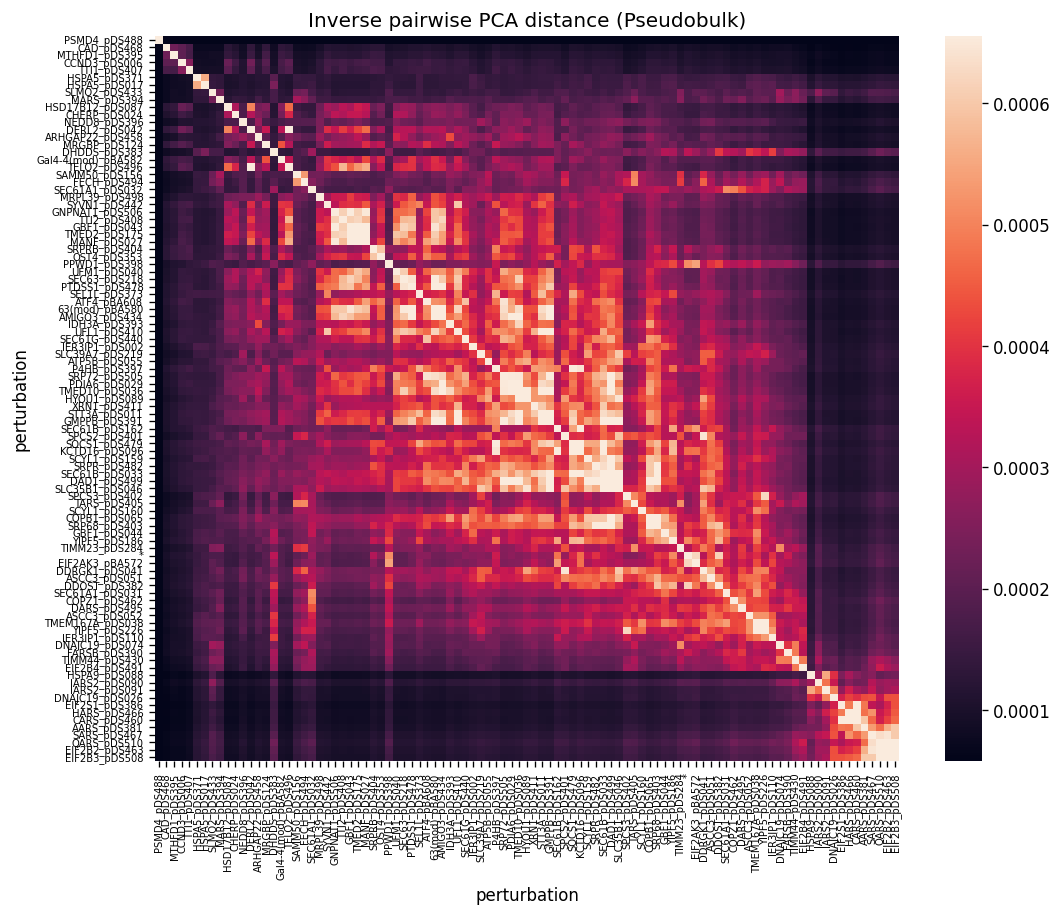

In [6]:
fig, ax = pl.subplots(figsize=[10,8], dpi=120)
sns.heatmap(tab, robust=True, ax=ax)
ax.set_xticks(np.arange(len(tab))+.5)
ax.set_xticklabels(tab.index, fontsize=6)
ax.set_yticks(np.arange(len(tab))+.5)
ax.set_yticklabels(tab.index, fontsize=6)
ax.set_title('Inverse pairwise PCA distance (Pseudobulk)')
pl.show()

In [94]:
tab = tab-np.diag(np.diag(tab.values))

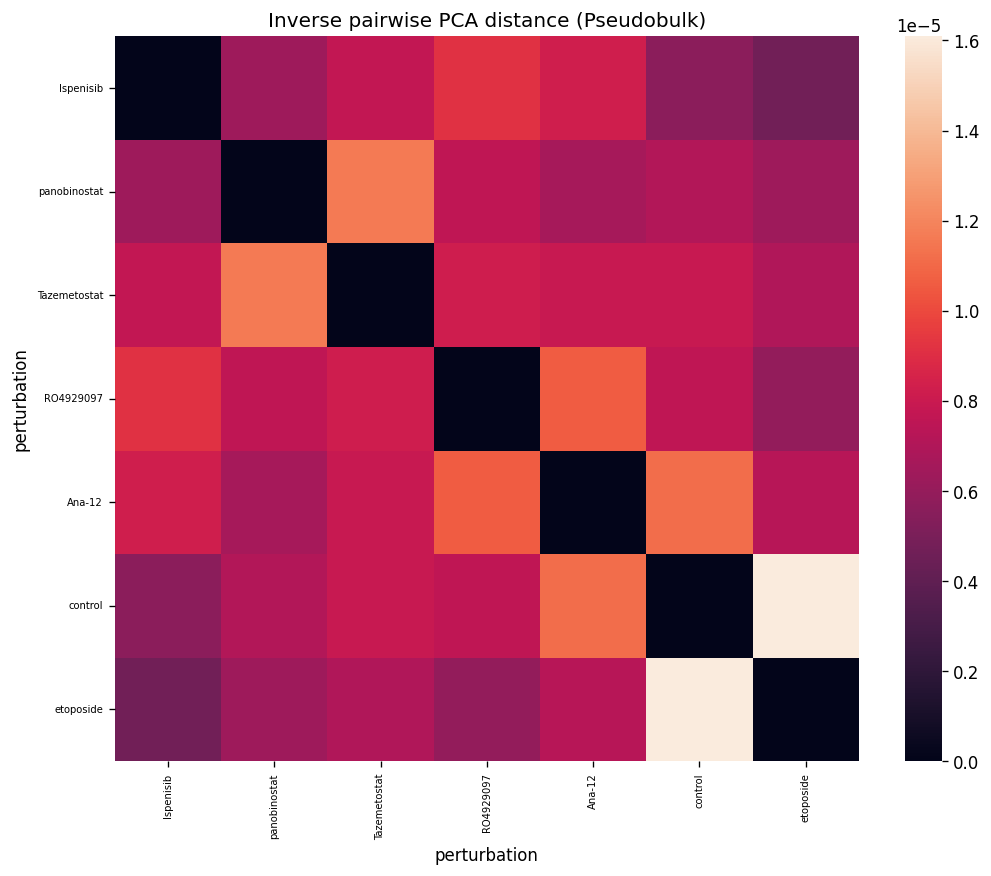

In [95]:
fig, ax = pl.subplots(figsize=[10,8], dpi=120)
sns.heatmap(ntab, robust=True, ax=ax)
ax.set_xticks(np.arange(len(tab))+.5)
ax.set_xticklabels(ntab.index, fontsize=6)
ax.set_yticks(np.arange(len(tab))+.5)
ax.set_yticklabels(ntab.index, fontsize=6)
ax.set_title('Inverse pairwise PCA distance (Pseudobulk)')
pl.show()

In [40]:
# maybe use correlation instead of distance???
Z = bdata.obsm['X_pca']
df = pd.DataFrame(Z, index=bdata.obs.perturbation)
pca_corr = df.T.corr()
tab = cluster_matrix(pca_corr, 'both')

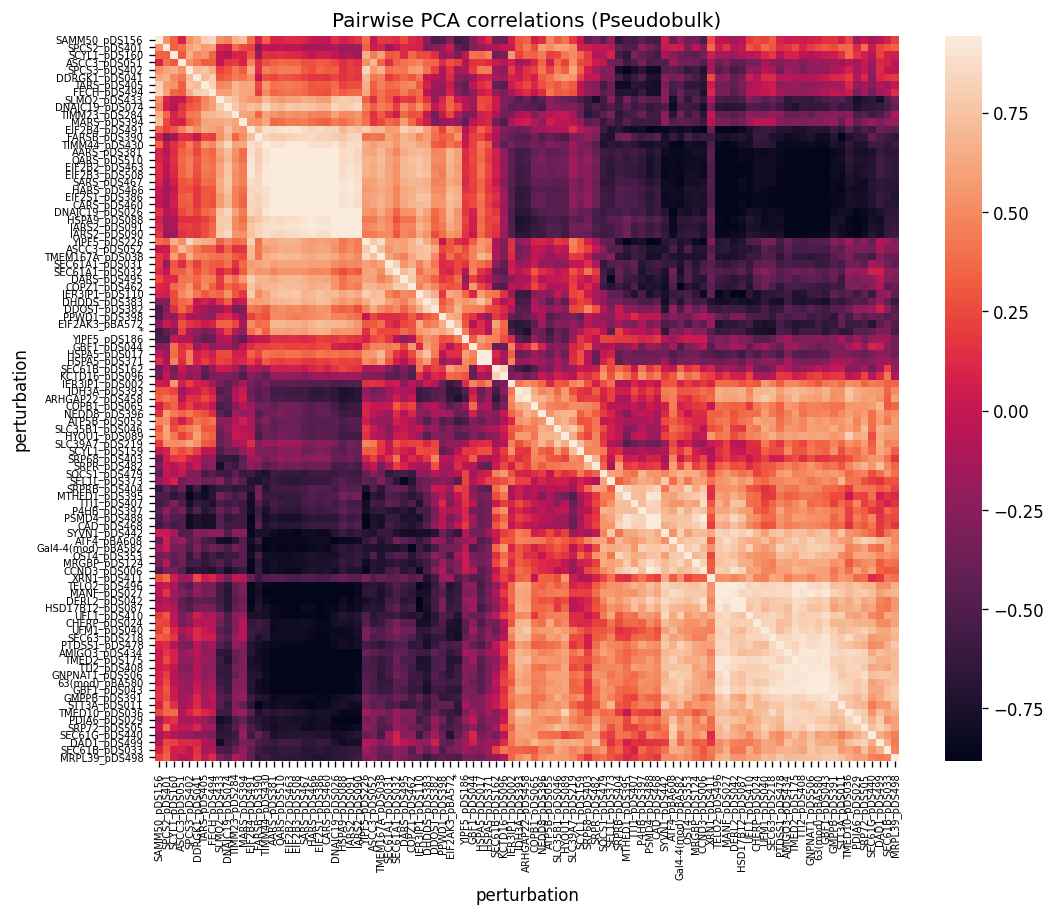

In [42]:
fig, ax = pl.subplots(figsize=[10,8], dpi=120)
sns.heatmap(tab, robust=True, ax=ax)
ax.set_xticks(np.arange(len(tab))+.5)
ax.set_xticklabels(tab.index, fontsize=6)
ax.set_yticks(np.arange(len(tab))+.5)
ax.set_yticklabels(tab.index, fontsize=6)
ax.set_title('Pairwise PCA correlations (Pseudobulk)')
pl.show()